**User Input Here**

In [ ]:
print('Welcome to The COVID-19 Tracking Project Statistics')
print('')
print('Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama')
print('states/territories not available: CA,DC,DE,IA,IL,LA,MI,MO,NC,NV,PA,TX,VT,WV')
userinput = input('Please put state here:')

Welcome to The COVID-19 Tracking Project Statistics

Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama
states/territories not available: CA,DC,DE,IA,IL,LA,MI,MO,NC,NV,PA,TX,VT,WV
Please put state here:FL


**Framework for Cases and Deaths from The COVID-19 Tracking Project**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://covidtracking.com/data/download/all-states-history.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
# dropping rows where it is not needed
df = df[df.state != 'PR']
df = df[df.state != 'VI']
df = df[df.state != 'GU']
df = df[df.state != 'AS']

In [ ]:
df = df.iloc[::-1]

In [ ]:
df = df.loc[:,['date','state','positive','death','hospitalizedCumulative']]

In [ ]:
df['deaths'] = df['death']
df['cases'] = df['positive']

In [ ]:
# resetting index
df = df.reset_index()

In [ ]:
# cleaning data
df = df.drop(columns = ['index','positive','death'])

In [ ]:
#converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df[df['date'] >= '03-01-2020']

In [ ]:
# making creating the day column
df['day'] = df.groupby('state')['date'].rank(ascending=True)

In [ ]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [ ]:
df = df[df['state'] == userinput]

In [ ]:
#making sure it only calculate where the deaths >0
df = df[(df['deaths'] > 0) & (df['cases']>0)]

In [ ]:
#Setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'day']

In [ ]:
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'day']

In [ ]:
# creating the CDF Column
df['cdf_cases'] = df['cases']

In [ ]:
#creating the cdf column
df['cdf_deaths'] = df['deaths']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [ ]:
#creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [ ]:
# Cleaning data
df= df.drop(columns = ['index'])

In [ ]:
#Calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'cases'] - df.loc[i-1, 'cases']) * (df.loc[i, 'day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [ ]:
#Calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'deaths'] - df.loc[i-1, 'deaths']) * (df.loc[i, 'day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [ ]:
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [ ]:
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['day']

In [ ]:
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['day']

**Framework hospital data**

In [ ]:
df = df[df.hospitalizedCumulative > 0]

In [ ]:
#creating the cdf column
df['cdf_hospitalized'] = df['hospitalizedCumulative']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index()

In [ ]:
# Cleaning data
df= df.drop(columns = ['index'])

In [ ]:
# Creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [ ]:
#Calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalizedCumulative'] - df.loc[i-1, 'hospitalizedCumulative']) * (df.loc[i, 'day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalizedCumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [ ]:
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [ ]:
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['day']

In [ ]:
df = df.loc[:,['date','state','deaths','cases','hospitalizedCumulative','day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [ ]:
df

,date,state,deaths,cases,hospitalizedCumulative,day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-03-21,FL,12.0,528.0,158.0,21.0,18.35,17.01,0.00,-1.34,-18.35,0.873810,0.810000,0.000000,0.000276554,0.000371909,0.00192128
1,2020-03-22,FL,13.0,731.0,185.0,22.0,19.36,17.39,3.21,-1.97,-16.15,0.880000,0.790455,0.145909,0.000382881,0.000402901,0.0022496
2,2020-03-23,FL,14.0,1029.0,217.0,23.0,20.41,17.79,6.13,-2.62,-14.28,0.887391,0.773478,0.266522,0.000538967,0.000433893,0.00263871
3,2020-03-24,FL,18.0,1205.0,259.0,24.0,20.93,19.17,9.03,-1.76,-11.90,0.872083,0.798750,0.376250,0.000631151,0.000557863,0.00314943
4,2020-03-25,FL,22.0,1488.0,316.0,25.0,21.70,20.23,11.91,-1.47,-9.79,0.868000,0.809200,0.476400,0.00077938,0.000681832,0.00384255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2021-03-03,FL,31829.0,1888725.0,81278.0,368.0,242.46,232.54,207.58,-9.92,-34.88,0.658859,0.631902,0.564076,0.989271,0.986456,0.988339
348,2021-03-04,FL,31955.0,1894722.0,81600.0,369.0,242.86,233.08,208.22,-9.78,-34.64,0.658157,0.631653,0.564282,0.992412,0.990361,0.992254
349,2021-03-05,FL,32093.0,1900598.0,81902.0,370.0,243.25,233.67,208.82,-9.58,-34.43,0.657432,0.631541,0.564378,0.99549,0.994638,0.995926
350,2021-03-06,FL,32200.0,1905185.0,82145.0,371.0,243.56,234.13,209.30,-9.43,-34.26,0.656496,0.631078,0.564151,0.997892,0.997955,0.998881


 **Statistics**

In [ ]:
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofhospitalization = df['Avg day of hospitalization'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [ ]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Hospitalization = ', averagedayofhospitalization)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  FL
Average Day of Death and Average Day of Case as of 2021-03-07 00:00:00
Case = 243.83
Death =  234.41
Hospitalization =  209.48
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 6.799999999999983
Case Day - Death Day = 25.090000000000003
Case Day - Hospitalization day =  2.8999999999999986
Hospialization Day - Case Day = 37.599999999999994


**Data Visualization**

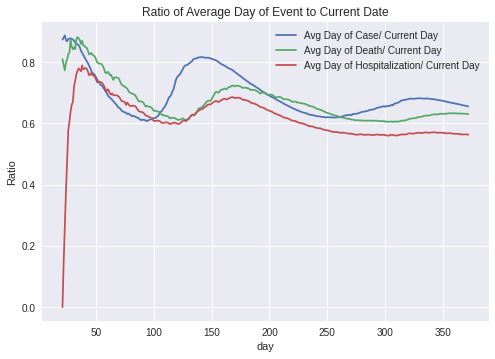

In [ ]:
#Ratio Avg Day of Event/Current Date Graph
df.plot(x= 'day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
plt.style.use('seaborn')

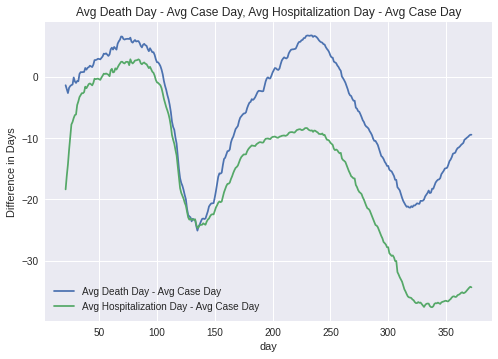

In [ ]:
#Avg Death Day-Avg Case Day
df.plot(x = 'day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
plt.style.use('seaborn')

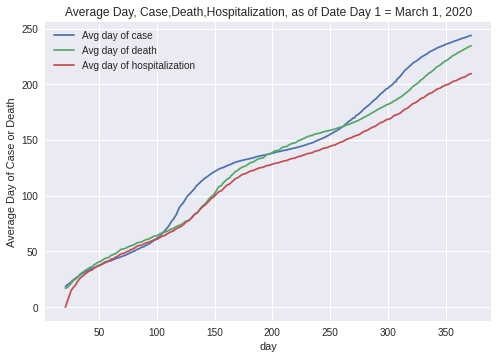

In [ ]:
#Average Case or Death or hospitalization
df.plot(x = 'day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
plt.style.use('seaborn')

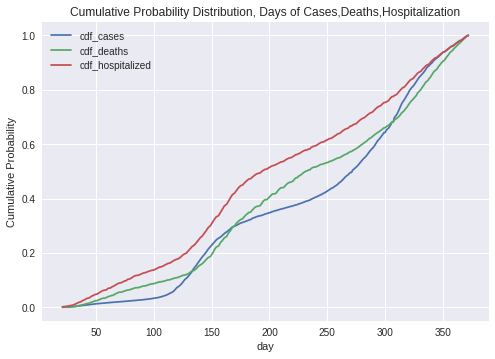

In [ ]:
#CDF
df.plot( x= 'day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')
plt.style.use('seaborn')